In [1]:
import pandas as pd 
import numpy as np 
import pyodbc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
server = 'localhost\SQLEXPRESS'
database = 'nba_game_data'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';')
cursor = cnxn.cursor()
sql = '''
with base as (
select 
action_type.PLAYER_ID
,action_type.GAME_ID
,[PlayerGameLogs].TEAM_ID
,[PlayerGameLogs].yearSeason
,[PlayerGameLogs].oppAbrv
,[PlayerGameLogs].GAME_DATE
,COALESCE(CASE WHEN ctr.[POSITION] = 'G-F' THEN 'G' ELSE
				 CASE WHEN ctr.[POSITION] = 'F-C' THEN 'F' ELSE
				 CASE WHEN ctr.[POSITION] = 'F-G' THEN 'F' ELSE
				 CASE WHEN ctr.[POSITION] = 'C-F' THEN 'C' ELSE
				 ctr.[POSITION] END END END END ,ctr2.POSITION,'NF') as POSITION
,COALESCE(AVG(CAST(Over_24_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Over_24_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Over_24_ft
,COALESCE(AVG(CAST(Back_Court_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Back_Court_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Back_Court_Shot
,COALESCE(AVG(CAST(Eight_to_Sixteen_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Eight_to_Sixteen_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Eight_to_Sixteen_ft
,COALESCE(AVG(CAST(Sixteen_to_TwentyFour_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Sixteen_to_TwentyFour_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Sixteen_to_TwentyFour_ft
,COALESCE(AVG(CAST(Less_Than_Eight_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Less_Than_Eight_ft AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Less_Than_Eight_ft
,COALESCE(AVG(CAST(Right_Side_R AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Right_Side_R AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Right_Side_R
,COALESCE(AVG(CAST(Left_Side_L AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Left_Side_L AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Left_Side_L
,COALESCE(AVG(CAST(Left_Side_Center_LC AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Left_Side_Center_LC AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Left_Side_Center_LC
,COALESCE(AVG(CAST(Center_C AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Center_C AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Center_C
,COALESCE(AVG(CAST(Back_Court_BC AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Back_Court_BC AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Back_Court_BC
,COALESCE(AVG(CAST(Above_the_Break_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Above_the_Break_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Above_the_Break_3
,COALESCE(AVG(CAST(Restricted_Area AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Restricted_Area AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Restricted_Area
,COALESCE(AVG(CAST(Mid_Range AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Mid_Range AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Mid_Range
,COALESCE(AVG(CAST(Left_Corner_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Left_Corner_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Left_Corner_3
,COALESCE(AVG(CAST(Backcourt AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Backcourt AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Backcourt
,COALESCE(AVG(CAST(In_The_Paint_Non_RA AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(In_The_Paint_Non_RA AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_In_The_Paint_Non_RA
,COALESCE(AVG(CAST(Right_Corner_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Right_Corner_3 AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Right_Corner_3
,COALESCE(AVG(CAST(Driving_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Bank_shot
,COALESCE(AVG(CAST(Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Hook_Shot
,COALESCE(AVG(CAST(Driving_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Jump_shot
,COALESCE(AVG(CAST(Running_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Hook_Shot
,COALESCE(AVG(CAST(Tip_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Tip_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Tip_Layup_Shot
,COALESCE(AVG(CAST(Step_Back_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Step_Back_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Step_Back_Jump_shot
,COALESCE(AVG(CAST(Running_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Finger_Roll_Layup_Shot
,COALESCE(AVG(CAST(Pullup_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Pullup_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Pullup_Bank_shot
,COALESCE(AVG(CAST(Driving_Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Reverse_Layup_Shot
,COALESCE(AVG(CAST(Running_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Layup_Shot
,COALESCE(AVG(CAST(Alley_Oop_Layup_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Alley_Oop_Layup_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Alley_Oop_Layup_shot
,COALESCE(AVG(CAST(Driving_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Hook_Shot
,COALESCE(AVG(CAST(Alley_Oop_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Alley_Oop_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Alley_Oop_Dunk_Shot
,COALESCE(AVG(CAST(Running_Alley_Oop_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Alley_Oop_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Alley_Oop_Dunk_Shot
,COALESCE(AVG(CAST(Turnaround_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Jump_Shot
,COALESCE(AVG(CAST(Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Reverse_Dunk_Shot
,COALESCE(AVG(CAST(Running_Pull_Up_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Pull_Up_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Pull_Up_Jump_Shot
,COALESCE(AVG(CAST(Driving_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Layup_Shot
,COALESCE(AVG(CAST(Turnaround_Fadeaway_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Fadeaway_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Fadeaway_shot
,COALESCE(AVG(CAST(Driving_Floating_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Floating_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Floating_Jump_Shot
,COALESCE(AVG(CAST(Driving_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Dunk_Shot
,COALESCE(AVG(CAST(Cutting_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Cutting_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Cutting_Dunk_Shot
,COALESCE(AVG(CAST(Running_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Dunk_Shot
,COALESCE(AVG(CAST(Running_Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Reverse_Dunk_Shot
,COALESCE(AVG(CAST(Running_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Jump_Shot
,COALESCE(AVG(CAST(Driving_Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Reverse_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Reverse_Dunk_Shot
,COALESCE(AVG(CAST(Putback_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Putback_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Putback_Layup_Shot
,COALESCE(AVG(CAST(Fadeaway_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Fadeaway_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Fadeaway_Bank_shot
,COALESCE(AVG(CAST(Hook_Bank_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Hook_Bank_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Hook_Bank_Shot
,COALESCE(AVG(CAST(Tip_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Tip_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Tip_Dunk_Shot
,COALESCE(AVG(CAST(Step_Back_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Step_Back_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Step_Back_Bank_Jump_Shot
,COALESCE(AVG(CAST(No_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(No_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_No_Shot
,COALESCE(AVG(CAST(Pullup_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Pullup_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Pullup_Jump_shot
,COALESCE(AVG(CAST(Turnaround_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Bank_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Bank_shot
,COALESCE(AVG(CAST(Running_Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Reverse_Layup_Shot
,COALESCE(AVG(CAST(Turnaround_Fadeaway_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Fadeaway_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Fadeaway_Bank_Jump_Shot
,COALESCE(AVG(CAST(Running_Alley_Oop_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Running_Alley_Oop_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Running_Alley_Oop_Layup_Shot
,COALESCE(AVG(CAST(Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Finger_Roll_Layup_Shot
,COALESCE(AVG(CAST(Cutting_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Cutting_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Cutting_Layup_Shot
,COALESCE(AVG(CAST(Turnaround_Bank_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Bank_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Bank_Hook_Shot
,COALESCE(AVG(CAST(Floating_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Floating_Jump_shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Floating_Jump_shot
,COALESCE(AVG(CAST(Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Layup_Shot
,COALESCE(AVG(CAST(Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Dunk_Shot
,COALESCE(AVG(CAST(Turnaround_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Turnaround_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Turnaround_Hook_Shot
,COALESCE(AVG(CAST(Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Reverse_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Reverse_Layup_Shot
,COALESCE(AVG(CAST(Cutting_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Cutting_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Cutting_Finger_Roll_Layup_Shot
,COALESCE(AVG(CAST(Driving_Floating_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Floating_Bank_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Floating_Bank_Jump_Shot
,COALESCE(AVG(CAST(Fadeaway_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Fadeaway_Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Fadeaway_Jump_Shot
,COALESCE(AVG(CAST(Jump_Bank_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Jump_Bank_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Jump_Bank_Shot
,COALESCE(AVG(CAST(Driving_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Finger_Roll_Layup_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Finger_Roll_Layup_Shot
,COALESCE(AVG(CAST(Putback_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Putback_Dunk_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Putback_Dunk_Shot
,COALESCE(AVG(CAST(Driving_Bank_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Driving_Bank_Hook_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Driving_Bank_Hook_Shot
,COALESCE(AVG(CAST(Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID, [PlayerGameLogs].yearSeason ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),AVG(CAST(Jump_Shot AS FLOAT)) OVER ( PARTITION BY action_type.PLAYER_ID ORDER BY [PlayerGameLogs].GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING ),0) AS Player_Jump_Shot

      ,tass.[Team_Allowed_Over_24_ft]
      ,tass.[Team_Allowed_Back_Court_Shot]
      ,tass.[Team_Allowed_Eight_to_Sixteen_ft]
      ,tass.[Team_Allowed_Sixteen_to_TwentyFour_ft]
      ,tass.[Team_Allowed_Less_Than_Eight_ft]
      ,tass.[Team_Allowed_Right_Side_R]
      ,tass.[Team_Allowed_Left_Side_L]
      ,tass.[Team_Allowed_Left_Side_Center_LC]
      ,tass.[Team_Allowed_Center_C]
      ,tass.[Team_Allowed_Back_Court_BC]
      ,tass.[Team_Allowed_Above_the_Break_3]
      ,tass.[Team_Allowed_Restricted_Area]
      ,tass.[Team_Allowed_Mid_Range]
      ,tass.[Team_Allowed_Left_Corner_3]
      ,tass.[Team_Allowed_Backcourt]
      ,tass.[Team_Allowed_In_The_Paint_Non_RA]
      ,tass.[Team_Allowed_Right_Corner_3]
      ,tass.[Team_Allowed_Driving_Bank_shot]
      ,tass.[Team_Allowed_Hook_Shot]
      ,tass.[Team_Allowed_Driving_Jump_shot]
      ,tass.[Team_Allowed_Running_Hook_Shot]
      ,tass.[Team_Allowed_Tip_Layup_Shot]
      ,tass.[Team_Allowed_Step_Back_Jump_shot]
      ,tass.[Team_Allowed_Running_Finger_Roll_Layup_Shot]
      ,tass.[Team_Allowed_Pullup_Bank_shot]
      ,tass.[Team_Allowed_Driving_Reverse_Layup_Shot]
      ,tass.[Team_Allowed_Running_Layup_Shot]
      ,tass.[Team_Allowed_Alley_Oop_Layup_shot]
      ,tass.[Team_Allowed_Driving_Hook_Shot]
      ,tass.[Team_Allowed_Alley_Oop_Dunk_Shot]
      ,tass.[Team_Allowed_Running_Alley_Oop_Dunk_Shot]
      ,tass.[Team_Allowed_Turnaround_Jump_Shot]
      ,tass.[Team_Allowed_Reverse_Dunk_Shot]
      ,tass.[Team_Allowed_Running_Pull_Up_Jump_Shot]
      ,tass.[Team_Allowed_Driving_Layup_Shot]
      ,tass.[Team_Allowed_Turnaround_Fadeaway_shot]
      ,tass.[Team_Allowed_Driving_Floating_Jump_Shot]
      ,tass.[Team_Allowed_Driving_Dunk_Shot]
      ,tass.[Team_Allowed_Cutting_Dunk_Shot]
      ,tass.[Team_Allowed_Running_Dunk_Shot]
      ,tass.[Team_Allowed_Running_Reverse_Dunk_Shot]
      ,tass.[Team_Allowed_Running_Jump_Shot]
      ,tass.[Team_Allowed_Driving_Reverse_Dunk_Shot]
      ,tass.[Team_Allowed_Putback_Layup_Shot]
      ,tass.[Team_Allowed_Fadeaway_Bank_shot]
      ,tass.[Team_Allowed_Hook_Bank_Shot]
      ,tass.[Team_Allowed_Tip_Dunk_Shot]
      ,tass.[Team_Allowed_Step_Back_Bank_Jump_Shot]
      ,tass.[Team_Allowed_No_Shot]
      ,tass.[Team_Allowed_Pullup_Jump_shot]
      ,tass.[Team_Allowed_Turnaround_Bank_shot]
      ,tass.[Team_Allowed_Running_Reverse_Layup_Shot]
      ,tass.[Team_Allowed_Turnaround_Fadeaway_Bank_Jump_Shot]
      ,tass.[Team_Allowed_Running_Alley_Oop_Layup_Shot]
      ,tass.[Team_Allowed_Finger_Roll_Layup_Shot]
      ,tass.[Team_Allowed_Cutting_Layup_Shot]
      ,tass.[Team_Allowed_Turnaround_Bank_Hook_Shot]
      ,tass.[Team_Allowed_Floating_Jump_shot]
      ,tass.[Team_Allowed_Layup_Shot]
      ,tass.[Team_Allowed_Dunk_Shot]
      ,tass.[Team_Allowed_Turnaround_Hook_Shot]
      ,tass.[Team_Allowed_Reverse_Layup_Shot]
      ,tass.[Team_Allowed_Cutting_Finger_Roll_Layup_Shot]
      ,tass.[Team_Allowed_Driving_Floating_Bank_Jump_Shot]
      ,tass.[Team_Allowed_Fadeaway_Jump_Shot]
      ,tass.[Team_Allowed_Jump_Bank_Shot]
      ,tass.[Team_Allowed_Driving_Finger_Roll_Layup_Shot]
      ,tass.[Team_Allowed_Putback_Dunk_Shot]
      ,tass.[Team_Allowed_Driving_Bank_Hook_Shot]
      ,tass.[Team_Allowed_Jump_Shot]
	  ,[PlayerGameLogs].PTS

from [nba_game_data].[dbo].action_type

LEFT OUTER JOIN [nba_game_data].[dbo].shot_zone_area
ON 
action_type.PLAYER_ID = shot_zone_area.PLAYER_ID
and action_type.GAME_ID = shot_zone_area.GAME_ID

LEFT OUTER JOIN [nba_game_data].[dbo].shot_zone_basic
ON 
action_type.PLAYER_ID = shot_zone_basic.PLAYER_ID
and action_type.GAME_ID = shot_zone_basic.GAME_ID

LEFT OUTER JOIN [nba_game_data].[dbo].shot_zone_range
ON 
action_type.PLAYER_ID = shot_zone_range.PLAYER_ID
and action_type.GAME_ID = shot_zone_range.GAME_ID

LEFT OUTER JOIN [nba_game_data].[dbo].[PlayerGameLogs]
ON 
action_type.PLAYER_ID = [PlayerGameLogs].PLAYER_ID
and action_type.GAME_ID = [PlayerGameLogs].GAME_ID

LEFT OUTER JOIN [nba_game_data].[dbo].[CommonTeamRoster] ctr
ON
cast(action_type.PLAYER_ID as int) = cast(ctr.PLAYER_ID as int)
AND cast([PlayerGameLogs].TEAM_ID as int) = cast(ctr.TeamID as int)
AND cast([PlayerGameLogs].yearSeason as int) = cast(ctr.SEASON as int)

LEFT OUTER JOIN [nba_game_data].[dbo].[BackupPlayerPosition] ctr2
ON 
cast(action_type.PLAYER_ID as int) = cast(ctr2.PLAYER_ID as int)

LEFT OUTER JOIN [nba_game_data].[dbo].[team_allowed_shooting_stats] tass
ON 
TRIM([PlayerGameLogs].oppAbrv)=TRIM(tass.TEAM_ABBREVIATION)
and action_type.GAME_ID = tass.GAME_ID
and COALESCE(CASE WHEN ctr.[POSITION] = 'G-F' THEN 'G' ELSE
				 CASE WHEN ctr.[POSITION] = 'F-C' THEN 'F' ELSE
				 CASE WHEN ctr.[POSITION] = 'F-G' THEN 'F' ELSE
				 CASE WHEN ctr.[POSITION] = 'C-F' THEN 'C' ELSE
				 ctr.[POSITION] END END END END ,ctr2.POSITION,'NF') = tass.POSITION
)
select *
,CASE WHEN [Team_Allowed_Over_24_ft] > Player_Over_24_ft THEN 1 ELSE 0 END AS Over_24_ft_Edge
,CASE WHEN [Team_Allowed_Back_Court_Shot] > Player_Back_Court_Shot THEN 1 ELSE 0 END AS Back_Court_Shot_Edge
,CASE WHEN [Team_Allowed_Eight_to_Sixteen_ft] > Player_Eight_to_Sixteen_ft THEN 1 ELSE 0 END AS Eight_to_Sixteen_ft_Edge
,CASE WHEN [Team_Allowed_Sixteen_to_TwentyFour_ft] > Player_Sixteen_to_TwentyFour_ft THEN 1 ELSE 0 END AS Sixteen_to_TwentyFour_ft_Edge
,CASE WHEN [Team_Allowed_Less_Than_Eight_ft] > Player_Less_Than_Eight_ft THEN 1 ELSE 0 END AS Less_Than_Eight_ft_Edge
,CASE WHEN [Team_Allowed_Right_Side_R] > Player_Right_Side_R THEN 1 ELSE 0 END AS Right_Side_R_Edge
,CASE WHEN [Team_Allowed_Left_Side_L] > Player_Left_Side_L THEN 1 ELSE 0 END AS Left_Side_L_Edge
,CASE WHEN [Team_Allowed_Left_Side_Center_LC] > Player_Left_Side_Center_LC THEN 1 ELSE 0 END AS Left_Side_Center_LC_Edge
,CASE WHEN [Team_Allowed_Center_C] > Player_Center_C THEN 1 ELSE 0 END AS Center_C_Edge
,CASE WHEN [Team_Allowed_Back_Court_BC] > Player_Back_Court_BC THEN 1 ELSE 0 END AS Back_Court_BC_Edge
,CASE WHEN [Team_Allowed_Above_the_Break_3] > Player_Above_the_Break_3 THEN 1 ELSE 0 END AS Above_the_Break_3_Edge
,CASE WHEN [Team_Allowed_Restricted_Area] > Player_Restricted_Area THEN 1 ELSE 0 END AS Restricted_Area_Edge
,CASE WHEN [Team_Allowed_Mid_Range] > Player_Mid_Range THEN 1 ELSE 0 END AS Mid_Range_Edge
,CASE WHEN [Team_Allowed_Left_Corner_3] > Player_Left_Corner_3 THEN 1 ELSE 0 END AS Left_Corner_3_Edge
,CASE WHEN [Team_Allowed_Backcourt] > Player_Backcourt THEN 1 ELSE 0 END AS Backcourt_Edge
,CASE WHEN [Team_Allowed_In_The_Paint_Non_RA] > Player_In_The_Paint_Non_RA THEN 1 ELSE 0 END AS In_The_Paint_Non_RA_Edge
,CASE WHEN [Team_Allowed_Right_Corner_3] > Player_Right_Corner_3 THEN 1 ELSE 0 END AS Right_Corner_3_Edge
,CASE WHEN [Team_Allowed_Driving_Bank_shot] > Player_Driving_Bank_shot THEN 1 ELSE 0 END AS Driving_Bank_shot_Edge
,CASE WHEN [Team_Allowed_Hook_Shot] > Player_Hook_Shot THEN 1 ELSE 0 END AS Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Jump_shot] > Player_Driving_Jump_shot THEN 1 ELSE 0 END AS Driving_Jump_shot_Edge
,CASE WHEN [Team_Allowed_Running_Hook_Shot] > Player_Running_Hook_Shot THEN 1 ELSE 0 END AS Running_Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Tip_Layup_Shot] > Player_Tip_Layup_Shot THEN 1 ELSE 0 END AS Tip_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Step_Back_Jump_shot] > Player_Step_Back_Jump_shot THEN 1 ELSE 0 END AS Step_Back_Jump_shot_Edge
,CASE WHEN [Team_Allowed_Running_Finger_Roll_Layup_Shot] > Player_Running_Finger_Roll_Layup_Shot THEN 1 ELSE 0 END AS Running_Finger_Roll_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Pullup_Bank_shot] > Player_Pullup_Bank_shot THEN 1 ELSE 0 END AS Pullup_Bank_shot_Edge
,CASE WHEN [Team_Allowed_Driving_Reverse_Layup_Shot] > Player_Driving_Reverse_Layup_Shot THEN 1 ELSE 0 END AS Driving_Reverse_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Layup_Shot] > Player_Running_Layup_Shot THEN 1 ELSE 0 END AS Running_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Alley_Oop_Layup_shot] > Player_Alley_Oop_Layup_shot THEN 1 ELSE 0 END AS Alley_Oop_Layup_shot_Edge
,CASE WHEN [Team_Allowed_Driving_Hook_Shot] > Player_Driving_Hook_Shot THEN 1 ELSE 0 END AS Driving_Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Alley_Oop_Dunk_Shot] > Player_Alley_Oop_Dunk_Shot THEN 1 ELSE 0 END AS Alley_Oop_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Alley_Oop_Dunk_Shot] > Player_Running_Alley_Oop_Dunk_Shot THEN 1 ELSE 0 END AS Running_Alley_Oop_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Jump_Shot] > Player_Turnaround_Jump_Shot THEN 1 ELSE 0 END AS Turnaround_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Reverse_Dunk_Shot] > Player_Reverse_Dunk_Shot THEN 1 ELSE 0 END AS Reverse_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Pull_Up_Jump_Shot] > Player_Running_Pull_Up_Jump_Shot THEN 1 ELSE 0 END AS Running_Pull_Up_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Layup_Shot] > Player_Driving_Layup_Shot THEN 1 ELSE 0 END AS Driving_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Fadeaway_shot] > Player_Turnaround_Fadeaway_shot THEN 1 ELSE 0 END AS Turnaround_Fadeaway_shot_Edge
,CASE WHEN [Team_Allowed_Driving_Floating_Jump_Shot] > Player_Driving_Floating_Jump_Shot THEN 1 ELSE 0 END AS Driving_Floating_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Dunk_Shot] > Player_Driving_Dunk_Shot THEN 1 ELSE 0 END AS Driving_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Cutting_Dunk_Shot] > Player_Cutting_Dunk_Shot THEN 1 ELSE 0 END AS Cutting_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Dunk_Shot] > Player_Running_Dunk_Shot THEN 1 ELSE 0 END AS Running_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Reverse_Dunk_Shot] > Player_Running_Reverse_Dunk_Shot THEN 1 ELSE 0 END AS Running_Reverse_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Jump_Shot] > Player_Running_Jump_Shot THEN 1 ELSE 0 END AS Running_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Reverse_Dunk_Shot] > Player_Driving_Reverse_Dunk_Shot THEN 1 ELSE 0 END AS Driving_Reverse_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Putback_Layup_Shot] > Player_Putback_Layup_Shot THEN 1 ELSE 0 END AS Putback_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Fadeaway_Bank_shot] > Player_Fadeaway_Bank_shot THEN 1 ELSE 0 END AS Fadeaway_Bank_shot_Edge
,CASE WHEN [Team_Allowed_Hook_Bank_Shot] > Player_Hook_Bank_Shot THEN 1 ELSE 0 END AS Hook_Bank_Shot_Edge
,CASE WHEN [Team_Allowed_Tip_Dunk_Shot] > Player_Tip_Dunk_Shot THEN 1 ELSE 0 END AS Tip_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Step_Back_Bank_Jump_Shot] > Player_Step_Back_Bank_Jump_Shot THEN 1 ELSE 0 END AS Step_Back_Bank_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_No_Shot] > Player_No_Shot THEN 1 ELSE 0 END AS No_Shot_Edge
,CASE WHEN [Team_Allowed_Pullup_Jump_shot] > Player_Pullup_Jump_shot THEN 1 ELSE 0 END AS Pullup_Jump_shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Bank_shot] > Player_Turnaround_Bank_shot THEN 1 ELSE 0 END AS Turnaround_Bank_shot_Edge
,CASE WHEN [Team_Allowed_Running_Reverse_Layup_Shot] > Player_Running_Reverse_Layup_Shot THEN 1 ELSE 0 END AS Running_Reverse_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Fadeaway_Bank_Jump_Shot] > Player_Turnaround_Fadeaway_Bank_Jump_Shot THEN 1 ELSE 0 END AS Turnaround_Fadeaway_Bank_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Running_Alley_Oop_Layup_Shot] > Player_Running_Alley_Oop_Layup_Shot THEN 1 ELSE 0 END AS Running_Alley_Oop_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Finger_Roll_Layup_Shot] > Player_Finger_Roll_Layup_Shot THEN 1 ELSE 0 END AS Finger_Roll_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Cutting_Layup_Shot] > Player_Cutting_Layup_Shot THEN 1 ELSE 0 END AS Cutting_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Bank_Hook_Shot] > Player_Turnaround_Bank_Hook_Shot THEN 1 ELSE 0 END AS Turnaround_Bank_Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Floating_Jump_shot] > Player_Floating_Jump_shot THEN 1 ELSE 0 END AS Floating_Jump_shot_Edge
,CASE WHEN [Team_Allowed_Layup_Shot] > Player_Layup_Shot THEN 1 ELSE 0 END AS Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Dunk_Shot] > Player_Dunk_Shot THEN 1 ELSE 0 END AS Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Turnaround_Hook_Shot] > Player_Turnaround_Hook_Shot THEN 1 ELSE 0 END AS Turnaround_Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Reverse_Layup_Shot] > Player_Reverse_Layup_Shot THEN 1 ELSE 0 END AS Reverse_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Cutting_Finger_Roll_Layup_Shot] > Player_Cutting_Finger_Roll_Layup_Shot THEN 1 ELSE 0 END AS Cutting_Finger_Roll_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Floating_Bank_Jump_Shot] > Player_Driving_Floating_Bank_Jump_Shot THEN 1 ELSE 0 END AS Driving_Floating_Bank_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Fadeaway_Jump_Shot] > Player_Fadeaway_Jump_Shot THEN 1 ELSE 0 END AS Fadeaway_Jump_Shot_Edge
,CASE WHEN [Team_Allowed_Jump_Bank_Shot] > Player_Jump_Bank_Shot THEN 1 ELSE 0 END AS Jump_Bank_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Finger_Roll_Layup_Shot] > Player_Driving_Finger_Roll_Layup_Shot THEN 1 ELSE 0 END AS Driving_Finger_Roll_Layup_Shot_Edge
,CASE WHEN [Team_Allowed_Putback_Dunk_Shot] > Player_Putback_Dunk_Shot THEN 1 ELSE 0 END AS Putback_Dunk_Shot_Edge
,CASE WHEN [Team_Allowed_Driving_Bank_Hook_Shot] > Player_Driving_Bank_Hook_Shot THEN 1 ELSE 0 END AS Driving_Bank_Hook_Shot_Edge
,CASE WHEN [Team_Allowed_Jump_Shot] > Player_Jump_Shot THEN 1 ELSE 0 END AS Jump_Shot_Edge
,CASE WHEN PTS> 21.5 THEN 1 ELSE 0 END AS PTS_THRESH

from base

WHERE PLAYER_ID = 1626157
AND yearSeason = 2024
order by PLAYER_ID, GAME_DATE


'''
df = pd.read_sql(sql,cnxn)  
cnxn.close()

C:\Users\bobby\AppData\Local\Temp\ipykernel_10464\262649375.py:285: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,cnxn)


In [3]:
df

,PLAYER_ID,GAME_ID,TEAM_ID,yearSeason,oppAbrv,GAME_DATE,POSITION,Player_Over_24_ft,Player_Back_Court_Shot,Player_Eight_to_Sixteen_ft,...,Reverse_Layup_Shot_Edge,Cutting_Finger_Roll_Layup_Shot_Edge,Driving_Floating_Bank_Jump_Shot_Edge,Fadeaway_Jump_Shot_Edge,Jump_Bank_Shot_Edge,Driving_Finger_Roll_Layup_Shot_Edge,Putback_Dunk_Shot_Edge,Driving_Bank_Hook_Shot_Edge,Jump_Shot_Edge,PTS_THRESH
0,1626157,0022300069,1610612750,2024,TOR,2023-10-25,C,0.404333,0.0,0.418194,...,0,0,0,1,0,0,0,0,0,0
1,1626157,0022300093,1610612750,2024,MIA,2023-10-28,C,0.200000,0.0,0.000000,...,0,0,0,1,0,1,0,0,0,0
2,1626157,0022300104,1610612750,2024,ATL,2023-10-30,C,0.225000,0.0,0.000000,...,1,0,0,1,0,1,1,0,1,0
3,1626157,0022300123,1610612750,2024,DEN,2023-11-01,C,0.261111,0.0,0.333333,...,0,0,0,1,0,1,0,0,1,0
4,1626157,0022300138,1610612750,2024,UTA,2023-11-04,C,0.258333,0.0,0.222222,...,0,0,0,1,0,1,1,0,1,1
5,1626157,0022300154,1610612750,2024,BOS,2023-11-06,C,0.273333,0.0,0.416667,...,0,0,0,0,0,1,1,0,0,0
6,1626157,0022300166,1610612750,2024,NOP,2023-11-08,C,0.251587,0.0,0.533333,...,0,0,0,1,0,1,1,0,1,1
7,1626157,0022300013,1610612750,2024,SAS,2023-11-10,C,0.329932,0.0,0.533333,...,0,1,0,1,0,1,0,0,1,1
8,1626157,0022300186,1610612750,2024,GSW,2023-11-12,C,0.342262,0.0,0.555556,...,0,0,0,1,0,0,1,0,0,0
9,1626157,0022300025,1610612750,2024,GSW,2023-11-14,C,0.378307,0.0,0.547619,...,0,0,0,1,0,0,1,0,0,1


In [107]:
server = 'localhost\SQLEXPRESS'
database = 'nba_game_data'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';')
cursor = cnxn.cursor()
sql = '''
with base as (
SELECT 
PSA.GAME_ID
,PSA.PLAYER_ID
,PSA.POSITION
,coalesce(avg(pgl.PTS) over (partition by PSA.PLAYER_ID,psa.yearSeason  order by  psa.GAME_DATE  ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING),avg(pgl.PTS) over (partition by PSA.PLAYER_ID order by  psa.GAME_DATE  ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING)) as avg_pts
,pgl.PTS
,PSA.Player_Right_Side_Shot_PCT
,TSA.Team_Allowed_Right_Side_Shot_PCT
,CAST(CASE WHEN PSA.Player_Right_Side_Shot_PCT < TSA.Team_Allowed_Right_Side_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Right_Side_Pct_Edge	
,CAST(CASE WHEN PSA.Player_Left_Side_Shot_PCT < TSA.Team_Allowed_Left_Side_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Left_Side_Pct_Edge
,CAST(CASE WHEN PSA.Player_Left_Center_Shot_PCT < TSA.Team_Allowed_Left_Center_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Left_Center_Pct_Edge
,CAST(CASE WHEN PSA.Player_Center_Shot_PCT < TSA.Team_Allowed_Center_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Center_Shot_Pct_Edge
,CAST(CASE WHEN PSA.Player_Back_Court_Shot_PCT < TSA.Team_Allowed_Back_Court_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Back_Court_Pct_Edge
,CAST(CASE WHEN PSA.Player_Right_Center_Shot_PCT < TSA.Team_Allowed_Right_Center_Shot_PCT THEN 1 ELSE 0 END AS FLOAT) AS Right_Center_Pct_Edge
 
,CAST(CASE WHEN PSA.Player_Right_Side_Shot_COUNT < TSA.Team_Allowed_Right_Side_Shot_COUNT THEN 1 ELSE 0 END AS FLOAT) AS Right_Side_Count_Edge
,CAST(CASE WHEN PSA.Player_Left_Side_Shot_COUNT < TSA.Team_Allowed_Left_Side_Shot_COUNT THEN 1 ELSE 0 END AS FLOAT) AS Left_Side_Count_Edge
,CAST(CASE WHEN PSA.Player_Left_Center_Shot_COUNT < TSA.Team_Allowed_Left_Center_Shot_COUNT THEN 1 ELSE 0 END  AS FLOAT) AS Left_Center_Count_Edge
,CAST(CASE WHEN PSA.Player_Center_Shot_COUNT < TSA.Team_Allowed_Center_Shot_COUNT THEN 1 ELSE 0 END AS FLOAT) AS Ceneter_Shot_Count_Edge					
,CAST(CASE WHEN PSA.Player_Back_Court_Shot_COUNT < TSA.Team_Allowed_Back_Court_Shot_COUNT THEN 1 ELSE 0 END  AS FLOAT) AS Back_Court_Shot_Count_Edge
,CAST(CASE WHEN PSA.Player_Right_Center_Shot_COUNT < TSA.Team_Allowed_Right_Center_Shot_COUNT THEN 1 ELSE 0 END AS FLOAT) AS Right_Center_Shot_Count_Edge

FROM [nba_game_data].[dbo].[playerShootingByShotZoneArea] psa

left outer join [nba_game_data].[dbo].[teamShootingAllowedByShotZoneArea] tsa
on 
psa.GAME_ID = tsa.GAME_ID
and psa.POSITION = tsa.POSITION
and psa.oppAbrv = tsa.TEAM_ABBREVIATION

left outer join [nba_game_data].[dbo].[PlayerGameLogs] pgl
on psa.GAME_ID = pgl.GAME_ID
and psa.PLAYER_ID = pgl.PLAYER_ID

WHERE 
psa.player_id = 1630169
and
psa.yearSeason =2024

)
select 

case when PTS > 27.5 then 1 else 0 end as pts_thresh,
Right_Side_Pct_Edge,
Left_Side_Pct_Edge,
Left_Center_Pct_Edge,
Center_Shot_Pct_Edge,
Back_Court_Pct_Edge,
Right_Center_Pct_Edge,
Right_Side_Count_Edge,
Left_Side_Count_Edge,
Left_Center_Count_Edge,
Ceneter_Shot_Count_Edge,
Back_Court_Shot_Count_Edge,
Right_Center_Shot_Count_Edge,	
cast((Right_Side_Pct_Edge+
Left_Side_Pct_Edge+
Left_Center_Pct_Edge+
Center_Shot_Pct_Edge+
Back_Court_Pct_Edge+
Right_Center_Pct_Edge+
Right_Side_Count_Edge+
Left_Side_Count_Edge+
Left_Center_Count_Edge+
Ceneter_Shot_Count_Edge+
Back_Court_Shot_Count_Edge+
Right_Center_Shot_Count_Edge)/12 as float)
from base 
where avg_pts is not null
'''

df = pd.read_sql(sql,cnxn)  
cnxn.close()

C:\Users\bobby\AppData\Local\Temp\ipykernel_16720\3584212790.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,cnxn)


In [63]:
df.columns


Index(['pts_thresh', 'Right_Side_Pct_Edge', 'Left_Side_Pct_Edge',
       'Left_Center_Pct_Edge', 'Center_Shot_Pct_Edge', 'Back_Court_Pct_Edge',
       'Right_Center_Pct_Edge', 'Right_Side_Count_Edge',
       'Left_Side_Count_Edge', 'Left_Center_Count_Edge',
       'Ceneter_Shot_Count_Edge', 'Back_Court_Shot_Count_Edge',
       'Right_Center_Shot_Count_Edge', ''],
      dtype='object')

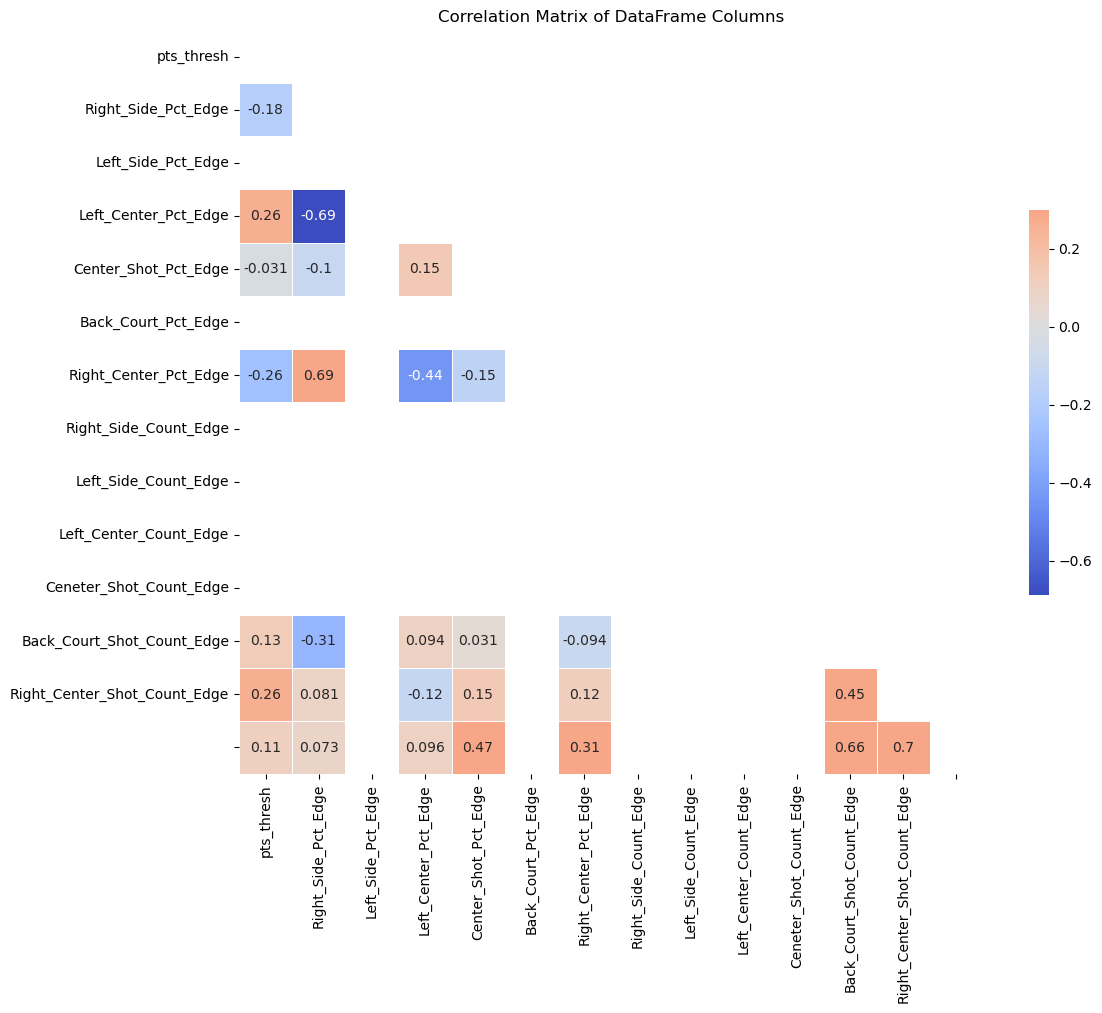

In [108]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [110]:
 X = df[[
       'Right_Side_Pct_Edge', 'Left_Side_Pct_Edge',
       'Left_Center_Pct_Edge', 'Center_Shot_Pct_Edge', 
       'Right_Center_Pct_Edge', 'Right_Side_Count_Edge',
       'Left_Side_Count_Edge', 'Left_Center_Count_Edge',
       'Ceneter_Shot_Count_Edge', 
       'Right_Center_Shot_Count_Edge'
        ]]
y = df['pts_thresh']


In [119]:
1-sum(y)/len(y)

0.631578947368421

In [111]:

# Initialize Decision Tree Classifier with max_depth=2
decision_tree = DecisionTreeClassifier(max_depth=3)

# 10-Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(decision_tree, X, y, cv=kf)

# Fit the model on the entire dataset to inspect the tree
decision_tree.fit(X, y)

# Extracting features used in the decision tree
features_used = [X.columns[i] for i in np.where(decision_tree.feature_importances_ > 0)[0]]

cv_scores.mean(), features_used

X = X[features_used]
y = df['pts_thresh']

In [113]:
def evaluate_model(model, X, y, n_splits=5):
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
               'f1': make_scorer(f1_score),
               'roc_auc': make_scorer(roc_auc_score, needs_proba=True)}
    
    kfold = StratifiedKFold(n_splits=n_splits)
    scores = cross_validate(model, X, y, scoring=scoring, cv=kfold, return_train_score=False)

    return {metric: np.mean(scores['test_' + metric]) for metric in scoring}


In [114]:
# Logistic Regression
log_reg_results = evaluate_model(LogisticRegression(), X, y)

# Decision Tree
decision_tree_results = evaluate_model(DecisionTreeClassifier(), X, y)

# Random Forest
random_forest_results = evaluate_model(RandomForestClassifier(), X, y)

# SVM
svm_results = evaluate_model(SVC(probability=True), X, y)

# Naive Bayes
naive_bayes_results = evaluate_model(GaussianNB(), X, y)

# k-NN
knn_results = evaluate_model(KNeighborsClassifier(), X, y)


C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\metrics

In [115]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'k-NN']
results = [log_reg_results, decision_tree_results, random_forest_results, svm_results, naive_bayes_results, knn_results]

for model, result in zip(models, results):
    print(f"{model}:")
    for metric, score in result.items():
        print(f"   {metric}: {score:.4f}")
    print()


Logistic Regression:
   accuracy: 0.6333
   precision: 0.0000
   recall: 0.0000
   f1: 0.0000
   roc_auc: 0.7000

Decision Tree:
   accuracy: 0.5167
   precision: 0.1333
   recall: 0.4000
   f1: 0.2000
   roc_auc: 0.6000

Random Forest:
   accuracy: 0.5167
   precision: 0.2333
   recall: 0.6000
   f1: 0.3333
   roc_auc: 0.7000

SVM:
   accuracy: 0.6333
   precision: 0.0000
   recall: 0.0000
   f1: 0.0000
   roc_auc: 0.3333

Naive Bayes:
   accuracy: 0.6167
   precision: 0.5000
   recall: 1.0000
   f1: 0.6533
   roc_auc: 0.7000

k-NN:
   accuracy: 0.5833
   precision: 0.0667
   recall: 0.2000
   f1: 0.1000
   roc_auc: 0.6667



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming 'X' and 'y' are your features and target variable respectively
# Replace with your actual data variables
# X, y = ...

# Create a logistic regression model with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', C=1.0)  # 'C' is the inverse of regularization strength

# Create a logistic regression model with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # 'liblinear' solver supports L1 penalty

# Perform 10-fold cross-validation and compute the accuracy
cv_scores_l2 = cross_val_score(model_l2, X, y, cv=10, scoring='accuracy')
cv_scores_l1 = cross_val_score(model_l1, X, y, cv=10, scoring='accuracy')

# Calculate the average of the cross-validation scores
average_cv_score_l2 = np.mean(cv_scores_l2)
average_cv_score_l1 = np.mean(cv_scores_l1)

print(f"L2 Regularization Average CV Accuracy: {average_cv_score_l2}")
print(f"L1 Regularization Average CV Accuracy: {average_cv_score_l1}")


L2 Regularization Average CV Accuracy: 0.65
L1 Regularization Average CV Accuracy: 0.65


C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [66]:

# Initialize Decision Tree Classifier with max_depth=2
decision_tree = DecisionTreeClassifier(max_depth=2)

# 10-Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(decision_tree, X, y, cv=kf)

# Fit the model on the entire dataset to inspect the tree
decision_tree.fit(X, y)

# Extracting features used in the decision tree
features_used = [X.columns[i] for i in np.where(decision_tree.feature_importances_ > 0)[0]]

cv_scores.mean(), features_used

X = X[features_used]
y = df['pts_thresh']

(0.3, ['Right_Center_Pct_Edge', 'Right_Center_Shot_Count_Edge'])

In [67]:
X = X[features_used]
y = df['pts_thresh']

In [90]:
1-(sum(y)/len(y))

0.631578947368421

In [69]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'X' and 'y' are your features and target variable respectively
# Replace with your actual data variables
# X, y = ...

# Initialize models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

# 10-Fold Cross validation with a fixed random state for reproducibility
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Dictionary to hold scores and confusion matrix percentages
scores = {name: {'F1': [], 'Accuracy': [], 'ConfusionMatrixPercentages': []} for name in models}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

        # Calculate metrics
        f1 = f1_score(y_test, predictions, average='binary', zero_division=0)
        accuracy = accuracy_score(y_test, predictions)

        # Calculate and store confusion matrix percentages
        cm = confusion_matrix(y_test, predictions)
        cm_sum = np.sum(cm)
        cm_percentages = 100 * cm / cm_sum if cm_sum > 0 else np.zeros_like(cm)
        scores[name]['ConfusionMatrixPercentages'].append(cm_percentages)

        # Store other scores
        scores[name]['F1'].append(f1)
        scores[name]['Accuracy'].append(accuracy)

# Calculate average scores and average confusion matrix percentages
average_scores = {name: {} for name in models}
for name in models:
    average_scores[name]['F1'] = np.mean(scores[name]['F1'])
    average_scores[name]['Accuracy'] = np.mean(scores[name]['Accuracy'])
    # Compute the average confusion matrix percentages
    average_cm_percentages = np.mean(scores[name]['ConfusionMatrixPercentages'], axis=0)
    average_scores[name]['ConfusionMatrixPercentages'] = average_cm_percentages

average_scores

C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


{'Gaussian Naive Bayes': {'F1': 0.4666666666666666,
  'Accuracy': 0.6,
  'ConfusionMatrixPercentages': array([[50., 70.],
         [30., 40.]])},
 'Logistic Regression': {'F1': 0.0,
  'Accuracy': 0.6,
  'ConfusionMatrixPercentages': array([[60., 50.],
         [90., 50.]])},
 'Decision Tree': {'F1': 0.0,
  'Accuracy': 0.4,
  'ConfusionMatrixPercentages': array([[40., 50.],
         [70., 30.]])},
 'Random Forest': {'F1': 0.0,
  'Accuracy': 0.3,
  'ConfusionMatrixPercentages': array([[30., 40.],
         [50., 10.]])},
 'SVM': {'F1': 0.0,
  'Accuracy': 0.4,
  'ConfusionMatrixPercentages': array([[40., 50.],
         [70., 30.]])},
 'XGBoost': {'F1': 0.0,
  'Accuracy': 0.6,
  'ConfusionMatrixPercentages': array([[60., 50.],
         [90., 50.]])},
 'CatBoost': {'F1': 0.0,
  'Accuracy': 0.4,
  'ConfusionMatrixPercentages': array([[40., 50.],
         [70., 30.]])},
 'LightGBM': {'F1': 0.0,
  'Accuracy': 0.6,
  'ConfusionMatrixPercentages': array([[60., 50.],
         [90., 50.]])}}

In [70]:
# ... (previous code for model training and evaluation)

# Function to calculate a weighted score
def weighted_score(f1, accuracy, f1_weight=0.5, accuracy_weight=0.5):
    return f1 * f1_weight + accuracy * accuracy_weight

# Find the best model based on weighted score
best_model_name = None
best_model_score = -1

for name in models:
    f1_avg = np.mean(scores[name]['F1'])
    accuracy_avg = np.mean(scores[name]['Accuracy'])
    model_score = weighted_score(f1_avg, accuracy_avg)

    if model_score > best_model_score:
        best_model_score = model_score
        best_model_name = name

print(f"The best model is {best_model_name} with a weighted score of {best_model_score:.2f}")


The best model is Gaussian Naive Bayes with a weighted score of 0.53


In [82]:
if best_model_name == 'Gaussian Naive Bayes':
    from skopt import BayesSearchCV
    from skopt.space import Real, Categorical, Integer
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import KFold
    from sklearn.metrics import make_scorer, accuracy_score

    # Assuming 'X' and 'y' are your features and target variable respectively
    # Replace with your actual data variables
    # X, y = ...

    # Define the hyperparameter space for GaussianNB
    # For GaussianNB, var_smoothing is a significant hyperparameter
    param_grid = {
        'var_smoothing': Real(1e-9, 1e-2, prior='log-uniform')  # Adjusted range
    }

    bayes_cv = BayesSearchCV(
        estimator=GaussianNB(),
        search_spaces=param_grid,
        scoring='accuracy',
        cv=KFold(n_splits=10, random_state=42, shuffle=True),
        n_jobs=-1,
        n_iter=32,
        return_train_score=True,
        random_state=42,
        n_points=5  # Evaluate more points at a time
#         n_restarts_optimizer=10  # More restarts
    )

    bayes_cv.fit(X, y)


    # Best parameters and score
    best_params = bayes_cv.best_params_
    best_score = bayes_cv.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")


C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\bobby\OneDrive\T-drive\Jupyter\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point 

Best Parameters: OrderedDict([('var_smoothing', 7.425534359037021e-07)])
Best Score: 0.6
